# train_hyperasの確認

In [39]:
import numpy as np
import pandas as pd
#最大表示列数の指定
pd.set_option('display.max_columns', 300)

%matplotlib inline 
import matplotlib.pyplot as plt

plt.style.use('ggplot') 

In [40]:
race_df = pd.read_csv("./csv/cleaned_race_data.csv", sep=",", low_memory=False)
horse_df = pd.read_csv("./csv/cleaned_horse_data.csv", sep=",", low_memory=False)

In [41]:
predict_result = pd.read_csv("./predict/train_no_obstacle_by_MLmethods_predicted_test_tokyo.csv", sep=",")
#predict_result = pd.read_csv("./predict/train_hyperas_predicted_test.csv", sep=",")

In [42]:
# 障害レースは取り除く
predict_result = predict_result[predict_result["is_obstacle"]==0]

In [43]:
predict_result.head()

,race_id,frame_number,horse_number,age,burden_weight,rider_id,horse_weight,date,is_senba,is_mesu,is_osu,distance,horse_weight_dif,burden_weight_rate,ground_status,total_horse_number,is_obstacle,weather_rain,weather_snow,weather_小雨,weather_小雪,weather_晴,weather_曇,weather_雨,weather_雪,pre_date_diff,is_rider_same,is_tamer_same,is_owner_same,rank_1,frame_number_1,horse_number_1,age_1,burden_weight_1,rider_id_1,goal_time_1,half_way_rank_1,last_time_1,odds_1,popular_1,horse_weight_1,is_down_1,distance_1,avg_velocity_1,horse_weight_dif_1,burden_weight_rate_1,ground_status_1,total_horse_number_1,is_obstacle_1,weather_rain_1,weather_snow_1,weather_小雨_1,weather_小雪_1,weather_晴_1,weather_曇_1,weather_雨_1,weather_雪_1,pre_date_diff_1,is_rider_same_1,is_tamer_same_1,is_owner_same_1,interval_date_1,rank_2,frame_number_2,horse_number_2,age_2,burden_weight_2,rider_id_2,goal_time_2,half_way_rank_2,last_time_2,odds_2,popular_2,horse_weight_2,is_down_2,distance_2,avg_velocity_2,horse_weight_dif_2,burden_weight_rate_2,ground_status_2,total_horse_number_2,is_obstacle_2,weather_rain_2,weather_snow_2,weather_小雨_2,weather_小雪_2,weather_晴_2,weather_曇_2,weather_雨_2,weather_雪_2,pre_date_diff_2,is_rider_same_2,is_tamer_same_2,is_owner_same_2,interval_date_2,rank_3,frame_number_3,horse_number_3,age_3,burden_weight_3,rider_id_3,goal_time_3,half_way_rank_3,last_time_3,odds_3,popular_3,horse_weight_3,is_down_3,distance_3,avg_velocity_3,horse_weight_dif_3,burden_weight_rate_3,ground_status_3,total_horse_number_3,is_obstacle_3,weather_rain_3,weather_snow_3,weather_小雨_3,weather_小雪_3,weather_晴_3,weather_曇_3,weather_雨_3,weather_雪_3,pre_date_diff_3,is_rider_same_3,is_tamer_same_3,is_owner_same_3,interval_date_3,tamer_id_106,tamer_id_110,tamer_id_119,tamer_id_131,tamer_id_138,tamer_id_141,tamer_id_180,tamer_id_184,tamer_id_198,tamer_id_201,tamer_id_202,tamer_id_203,tamer_id_208,tamer_id_216,tamer_id_219,tamer_id_221,tamer_id_224,tamer_id_244,tamer_id_248,tamer_id_253,tamer_id_257,tamer_id_261,...,owner_id_951004,owner_id_951005,owner_id_951006,owner_id_951033,owner_id_952006,owner_id_952009,owner_id_952033,owner_id_952800,owner_id_953030,owner_id_954030,owner_id_954033,owner_id_955006,owner_id_955030,owner_id_955033,owner_id_956002,owner_id_956009,owner_id_956031,owner_id_956033,owner_id_956800,owner_id_95700,owner_id_957007,owner_id_957030,owner_id_957033,owner_id_95803,owner_id_958030,owner_id_958031,owner_id_958033,owner_id_958800,owner_id_959030,owner_id_959800,owner_id_960006,owner_id_960030,owner_id_960033,owner_id_96006,owner_id_96007,owner_id_96031,owner_id_961006,owner_id_962006,owner_id_962031,owner_id_962033,owner_id_963002,owner_id_964030,owner_id_965006,owner_id_965009,owner_id_965030,owner_id_965031,owner_id_965033,owner_id_965800,owner_id_966002,owner_id_966006,owner_id_966007,owner_id_966030,owner_id_967030,owner_id_967033,owner_id_968006,owner_id_969006,owner_id_969031,owner_id_969033,owner_id_970006,owner_id_970007,owner_id_970008,owner_id_97002,owner_id_970030,owner_id_970033,owner_id_97007,owner_id_97031,owner_id_970800,owner_id_971033,owner_id_972002,owner_id_972007,owner_id_972009,owner_id_972030,owner_id_972033,owner_id_972800,owner_id_973006,owner_id_973007,owner_id_973030,owner_id_973800,owner_id_974007,owner_id_974030,owner_id_974033,owner_id_975002,owner_id_975007,owner_id_975009,owner_id_975030,owner_id_975033,owner_id_976800,owner_id_97700,owner_id_977005,owner_id_977007,owner_id_977800,owner_id_978007,owner_id_978033,owner_id_978800,owner_id_979007,owner_id_979033,owner_id_980033,owner_id_98007,owner_id_98031,owner_id_981001,owner_id_981002,owner_id_981800,owner_id_982006,owner_id_982033,owner_id_984031,owner_id_984800,owner_id_985001,owner_id_985002,owner_id_985033,owner_id_986002,owner_id_986031,owner_id_986033,owner_id_987033,owner_id_987800,owner_id_988002,owner_id_988005,owner_id_98803,owner_id_988033,owner_id_988800,owner_id_989008,owner_id_989031,owner_id_989033,owner_id_990030,owner_id_990033,owner_id_99007,owner_id_99031,owner_id_99

In [44]:
# 予測値を100倍して見やすくする
predict_result["predict_is_tansyo"] = predict_result["predict_is_tansyo"]*100
predict_result["predict_is_hukusyo"] = predict_result["predict_is_hukusyo"]*100

In [45]:
predict_result.shape

(2458, 3291)

## accuracy の計算
groupbyして、レースごとに確率の最も高い馬を見つける。
正解していたかを判定

In [46]:
# group by したデータフレームに対して行う処理
def check_is_correct_predict_is_tansyo(one_race_data):
    max_pred_horse = one_race_data.loc[one_race_data['predict_is_tansyo'].idxmax()]
    return max_pred_horse['is_tansyo']
def check_is_correct_predict_is_hukusyo(one_race_data):
    max_pred_horse = one_race_data.loc[one_race_data['predict_is_hukusyo'].idxmax()]
    return max_pred_horse['is_hukusyo']

In [47]:
part_predict_result = predict_result[["race_id","date","horse_number","predict_is_hukusyo", "is_hukusyo","predict_is_tansyo", "is_tansyo"]]

is_tansyo = part_predict_result.groupby('race_id').apply(check_is_correct_predict_is_tansyo)
is_hukusyo = part_predict_result.groupby('race_id').apply(check_is_correct_predict_is_hukusyo)
print("tansyo accuracy: {}".format(is_tansyo.sum()/is_tansyo.size))
print("hukusyo accuracy: {}".format(is_hukusyo.sum()/is_hukusyo.size))

tansyo accuracy: 0.296875
hukusyo accuracy: 0.5625


In [48]:
threshold = 0.62 * 100
# group by したデータフレームに対して行う処理
def check_is_correct_predict_is_tansyo_only_threshold(one_race_data):
    max_pred_horse = one_race_data.loc[one_race_data['predict_is_tansyo'].idxmax()]
    return None if max_pred_horse['predict_is_tansyo'] < threshold else max_pred_horse['is_tansyo']
def check_is_correct_predict_is_hukusyo_only_threshold(one_race_data):
    max_pred_horse = one_race_data.loc[one_race_data['predict_is_hukusyo'].idxmax()]
    return None if max_pred_horse['predict_is_hukusyo'] < threshold else max_pred_horse['is_hukusyo']


is_tansyo = part_predict_result.groupby('race_id').apply(check_is_correct_predict_is_tansyo_only_threshold)
is_hukusyo = part_predict_result.groupby('race_id').apply(check_is_correct_predict_is_hukusyo_only_threshold)

print("number of all race: {}".format(is_tansyo.size))
is_tansyo = is_tansyo.dropna()
is_hukusyo = is_hukusyo.dropna()
print("number of race after droping low predict (tansyo): {}".format(is_tansyo.size))
print("tansyo accuracy: {}".format(is_tansyo.sum()/is_tansyo.size))
print("number of race after droping low predict (hukusyo): {}".format(is_hukusyo.size))
print("hukusyo accuracy: {}".format(is_hukusyo.sum()/is_hukusyo.size))


number of all race: 192
number of race after droping low predict (tansyo): 84
tansyo accuracy: 0.40476190476190477
number of race after droping low predict (hukusyo): 163
hukusyo accuracy: 0.6073619631901841


# blending
お互いの欠点を補い合えるかも...？

In [49]:
blend_df = predict_result.copy()
blend_df["blend"] = 0.5*blend_df["predict_is_tansyo"] + 0.5*blend_df["predict_is_hukusyo"]
blend_df = blend_df[["race_id","date","horse_number", "blend","is_hukusyo", "is_tansyo"]]

def blend_check_is_correct_predict_is_tansyo(one_race_data):
    return one_race_data.loc[one_race_data['blend'].idxmax()]['is_tansyo']
def blend_check_is_correct_predict_is_hukusyo(one_race_data):
    return one_race_data.loc[one_race_data['blend'].idxmax()]['is_hukusyo']

is_tansyo = blend_df.groupby('race_id').apply(blend_check_is_correct_predict_is_tansyo)
is_hukusyo = blend_df.groupby('race_id').apply(blend_check_is_correct_predict_is_hukusyo)
print("tansyo accuracy: {}".format(is_tansyo.sum()/is_tansyo.size))
print("hukusyo accuracy: {}".format(is_hukusyo.sum()/is_hukusyo.size))

tansyo accuracy: 0.3072916666666667
hukusyo accuracy: 0.5625


## 同着の試合があるかもしれないので取り除く
同着はデータがおかしくなっているので取り除く。
また、10頭以下のレースは取り除く

In [50]:
merged_df = pd.merge(blend_df, race_df, on="race_id")
merged_df = pd.merge(merged_df, horse_df, on=['race_id','horse_number'])
merged_df['tansyo_return'] = merged_df['is_tansyo']*merged_df['tansyo'] - 100
merged_df["hukusyo_return"] = (merged_df["rank"]==1)*merged_df["hukusyo_first"] + (merged_df["rank"]==2)*merged_df["hukusyo_second"] + (merged_df["rank"]==3)*merged_df["hukusyo_third"]  - 100

In [51]:
def remove_same(one_horse_data):
    #  数レース分の情報を結合
    result_df = one_horse_data.copy()
    
    if result_df["rank"].duplicated().sum() or result_df["total_horse_number"].iloc[0]<10:
        return 
    else:
        return result_df

In [52]:
print(merged_df.shape)
removed = merged_df.groupby("race_id").apply(remove_same)
print(removed.shape)

(2458, 61)
(2102, 61)


## 可視化

In [53]:
removed = removed.reset_index(drop=True)
removed.head()

,race_id,date_x,horse_number,blend,is_hukusyo,is_tansyo,race_round,weather,ground_status,date_y,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,is_obstacle,ground_type,is_left_right_straight,distance_x,weather_rain,weather_snow,rank,frame_number,horse_id,age,burden_weight,rider_id,goal_time,half_way_rank,last_time,odds,popular,horse_weight,tamer_id,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance_y,avg_velocity,horse_weight_dif,burden_weight_rate,tansyo_return,hukusyo_return
0,201905021111,2019-05-25 15:45:00,2.0,43.988754,0,0,11,晴,1,2019-05-25 15:45:00,東京,16,1,1,5,10,4,7,250,130,240,180,790,1320,490,340,980,2000,2450,10480,0.0,ダ,左,1400,0,0,4,1,2014101173,5,56.0,1122,83.9,5.000000,35.8,14.2,5.0,508.0,1105,271008,2019-05-25 15:45:00,0,0,0,1,1400,16.686532,-4.0,0.110236,-100,-100
1,201905030209,2019-06-02 14:25:00,11.0,70.260719,0,0,9,曇,1,2019-06-02 14:25:00,東京,11,3,3,2,2,5,5,3940,760,220,310,8930,8630,2400,3150,650,21780,15270,154550,0.0,芝,左,2000,0,0,4,8,2015101568,4,57.0,5339,120.7,8.000000,33.3,3.3,1.0,508.0,1126,3060,2019-06-02 14:25:00,0,0,0,1,2000,16.570008,2.0,0.112205,-100,-100
2,201905030209,2019-06-02 14:25:00,7.0,55.780936,0,0,9,曇,1,2019-06-02 14:25:00,東京,11,3,3,2,2,5,5,3940,760,220,310,8930,8630,2400,3150,650,21780,15270,154550,0.0,芝,左,2000,0,0,5,6,2014105348,5,57.0,1092,120.9,5.000000,33.8,32.9,8.0,468.0,1069,415800,2019-06-02 14:25:00,0,0,0,1,2000,16.542597,6.0,0.121795,-100,-100
3,201905030209,2019-06-02 14:25:00,3.0,40.851205,1,1,9,曇,1,2019-06-02 14:25:00,東京,11,3,3,2,2,5,5,3940,760,220,310,8930,8630,2400,3150,650,21780,15270,154550,0.0,芝,左,2000,0,0,1,3,2014100752,5,55.0,1091,120.1,3.666667,33.0,39.4,10.0,488.0,1103,546800,2019-06-02 14:25:00,0,0,1,0,2000,16.652789,-4.0,0.112705,3840,660
4,201905030209,2019-06-02 14:25:00,2.0,59.845331,1,0,9,曇,1,2019-06-02 14:25:00,東京,11,3,3,2,2,5,5,3940,760,220,310,8930,8630,2400,3150,650,21780,15270,154550,0.0,芝,左,2000,0,0,2,2,2014102190,5,57.0,1014,120.1,1.000000,33.2,5.2,3.0,506.0,1055,3060,2019-06-02 14:25:00,0,0,0,1,2000,16.652789,-2.0,0.112648,-100,120


<AxesSubplot:ylabel='Frequency'>

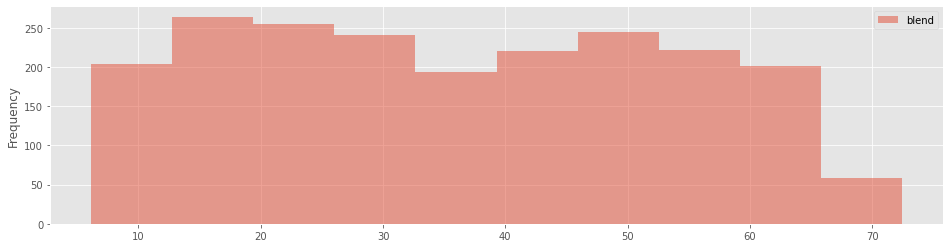

In [54]:
# blendの分布についてヒストグラム
removed.plot(kind='hist', y='blend' , bins=10, figsize=(16,4), alpha=0.5)

<AxesSubplot:xlabel='blend', ylabel='odds'>

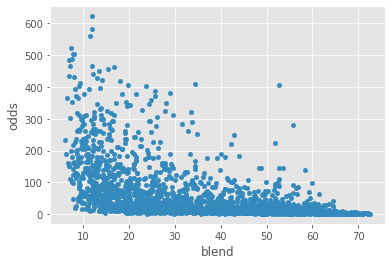

In [55]:
# オッズと予測値
removed.plot(kind='scatter', x='blend', y='odds')

<AxesSubplot:xlabel='blend', ylabel='odds'>

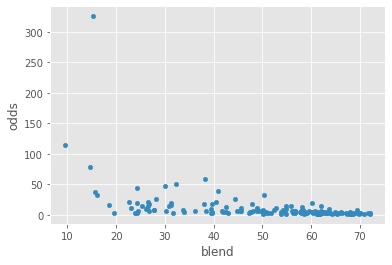

In [56]:
# 実際に1位になったものについてのオッズと予測値
removed[removed["rank"]==1].plot(kind='scatter', x='blend', y='odds')

<AxesSubplot:xlabel='blend', ylabel='odds'>

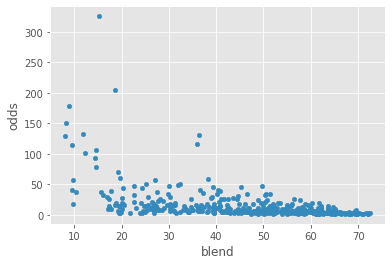

In [57]:
# 実際に複勝圏内になったものについてのオッズと予測値
removed[removed["rank"]<=3].plot(kind='scatter', x='blend', y='odds')

## 的中率の計算(実際に1位や３位以内であった確率）

In [58]:
# cut
removed["blend_cut"] = pd.cut(removed["blend"], 10)

<AxesSubplot:xlabel='blend_cut'>

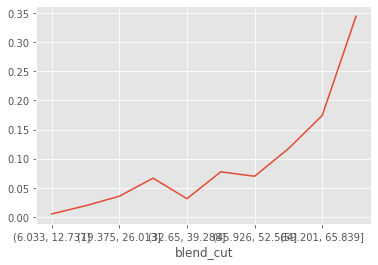

In [59]:
# tansyo
def right_rate_tansyo(one_cut):
    return one_cut["is_tansyo"].sum()/len(one_cut)
    
removed.groupby("blend_cut").apply(right_rate_tansyo).plot()

<AxesSubplot:xlabel='blend_cut'>

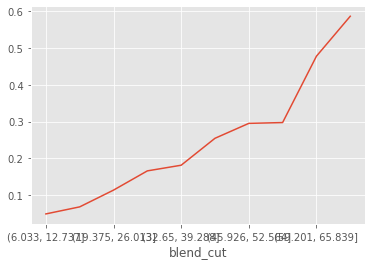

In [60]:
# hukusyo
def right_rate_hukusyo(one_cut):
    return one_cut["is_hukusyo"].sum()/len(one_cut)
    
removed.groupby("blend_cut").apply(right_rate_hukusyo).plot()

## 回収率の計算

In [61]:
def get_return(one_race):
    tmp = one_race.reset_index()
    return tmp.loc[tmp['blend'].idxmax(),['tansyo_return','hukusyo_return','odds','date','blend']]

race_result = removed.groupby("race_id").apply(get_return)

In [62]:
race_result = race_result.sort_values("date")

In [63]:
race_result = race_result.set_index("date")

### 単勝

<AxesSubplot:xlabel='date'>

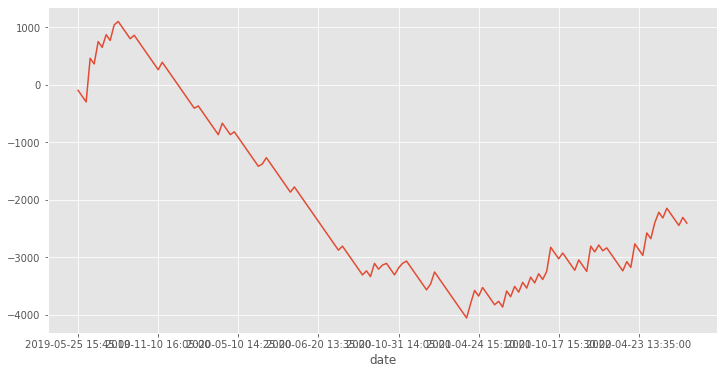

In [64]:
# 単純に買い続けたとき
simple = race_result["tansyo_return"].cumsum()
simple.plot(figsize=(12, 6))

<AxesSubplot:xlabel='date'>

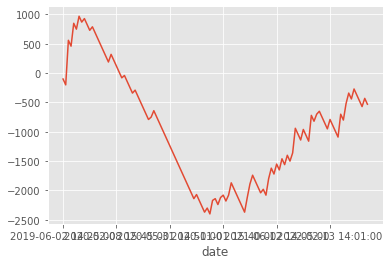

In [70]:
# blendがある程度あるときだけ
simple = race_result.loc[(race_result["blend"]>60), 'tansyo_return'].cumsum()
simple.plot()

<AxesSubplot:xlabel='date'>

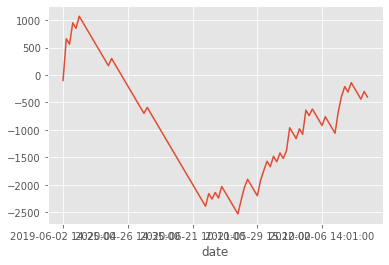

In [73]:
# オッズがある範囲のとき
simple = race_result.loc[((race_result["odds"]>2) & (race_result["odds"]<60) & (race_result["blend"]>60)), 'tansyo_return'].cumsum()
simple.plot()

### 複勝

<AxesSubplot:xlabel='date'>

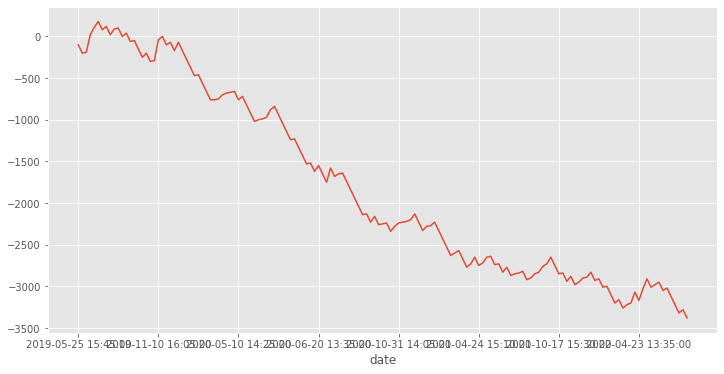

In [67]:
# 単純に買い続けたとき
simple = race_result["hukusyo_return"].cumsum()
simple.plot(figsize=(12, 6))

<AxesSubplot:xlabel='date'>

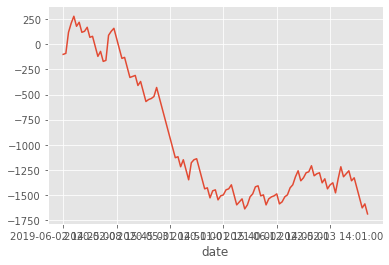

In [75]:
# blendの予測値を含める
simple = race_result.loc[(race_result["blend"]>60), 'hukusyo_return'].cumsum()
simple.plot()

<AxesSubplot:xlabel='date'>

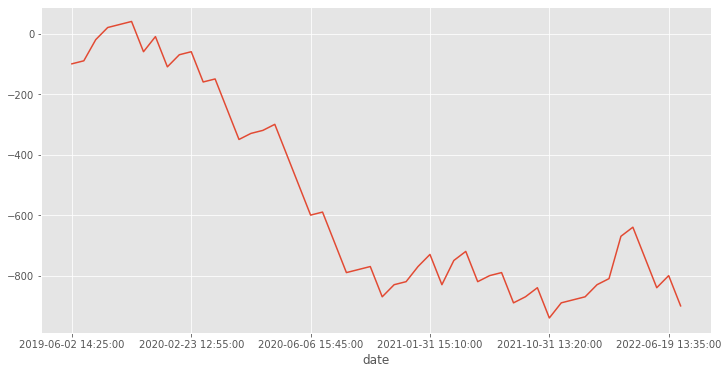

In [79]:
# オッズがある範囲のとき
simple = race_result.loc[((race_result["odds"]>1.2) & (race_result["odds"]<65) & (race_result["blend"]>65)), 'hukusyo_return'].cumsum()
simple.plot(figsize=(12, 6))